**Name: Ali Oku <br>
Z-ID: Z1893417 <br>
Assignment 8<br>**

**1. Maximum Combat Power** <br>
**a. Compute Combat Power**

In [29]:
import pandas as pd

#Read json file
pokemon_data = pd.read_json("pokemon.json")
pokemon_data = pokemon_data.set_index("name")

Attack = 2 * round((pokemon_data["attack"] ** 0.5)* (pokemon_data["sp_attack"] ** 0.5) + (pokemon_data["speed"]**0.5))
Defense = 2 * round((pokemon_data["defense"]**0.5) * (pokemon_data["sp_defense"]**0.5) + (pokemon_data["speed"]**0.5))
Stamina = 2 * pokemon_data["hp"]

pokemon_data["max_cp"] = (Attack + 15) * ((Defense + 15)**0.5) * ((Stamina + 15)**0.5) * (0.7903001**2 / 10)
pokemon_data

,generation,species,primary_type,hp,height_m,weight_kg,speed,attack,defense,sp_attack,sp_defense,max_cp
name,,,,,,,,,,,,
Bulbasaur,1,Seed Pokémon,Grass,45,0.7,6.9,45,49,49,65,65,1071.537544
Ivysaur,1,Seed Pokémon,Grass,60,1.0,13.0,60,62,63,80,80,1632.187772
Venusaur,1,Seed Pokémon,Grass,80,2.0,100.0,80,82,83,100,100,2580.488521
Mega Venusaur,1,Seed Pokémon,Grass,80,2.4,155.5,80,100,123,122,120,3466.490116
Charmander,1,Lizard Pokémon,Fire,39,0.6,8.5,65,52,43,60,50,955.243610
...,...,...,...,...,...,...,...,...,...,...,...,...
Zacian Hero of Many Battles,8,Warrior Pokémon,Fairy,92,2.8,110.0,138,130,115,80,115,3511.502853
Zamazenta Crowned Shield,8,Warrior Pokémon,Fighting,92,2.9,785.0,128,130,145,80,145,3839.737461
Zamazenta Hero of Many Battles,8,Warrior Pokémon,Fighting,92,2.9,210.0,138,130,115,80,115,3511.502853


 **b. Maximum Combat Power by Generation**

In [2]:
pokemon_data.sort_values(by='max_cp', ascending=False).drop_duplicates(subset=['generation'])[["max_cp", "generation"]].sort_values(by="generation")

,max_cp,generation
name,,
Mega Mewtwo X,5490.480903,1
Mega Tyranitar,4464.706056,2
Mega Rayquaza,5725.850606,3
Mega Garchomp,4720.455236,4
White Kyurem,4895.570422,5
Zygarde Complete Forme,4669.483338,6
Ultra Necrozma,5091.398806,7
Eternatus Eternamax,9186.088759,8


**2. Primary Types and Attack, Defense, & Speed**

**a. Bar chart**

<AxesSubplot:xlabel='primary_type'>

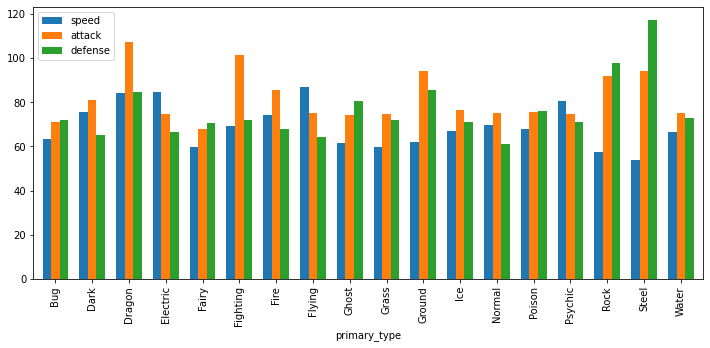

In [3]:
pokemon_data.groupby("primary_type")[["speed", "attack", "defense"]].mean().plot(kind = 'bar', figsize = (12,5), width = 0.7)

**b. Scatterplot**

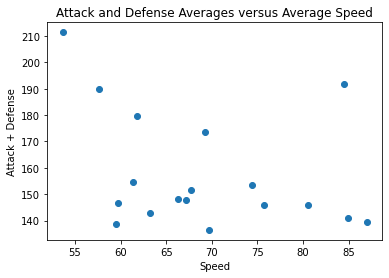

,speed,attack,defense,attack_defense
primary_type,,,,
Dragon,84.45,107.2,84.775,191.975


In [23]:
import matplotlib.pyplot as plt
pk_data = pokemon_data.groupby("primary_type")[["speed", "attack", "defense"]].mean().copy()
pk_data["attack_defense"] = pk_data["defense"] + pk_data["attack"]


fig, ax = plt.subplots()
ax.scatter(pk_data["speed"],pk_data["attack_defense"])
ax.set_xlabel('Speed')
ax.set_ylabel('Attack + Defense')
ax.set_title('Attack and Defense Averages versus Average Speed')
plt.show(fig)


#determining the outlier 
#outlier lies at the upper right corner of graph
#outlier's speed value is greater than 75 and Attack+Defense value is greater than 170
#Outlier's primary type is "Dragon"
pk_data[(pk_data["speed"] > 75) & (pk_data["attack_defense"] > 170)]

**c. Interactive Scatter Matrix**

In [25]:
import altair as alt
# pk_data = pk_data.reset_index()

brush = alt.selection(type='interval', resolve = 'global')

alt.Chart(pk_data).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(zero=False)),
    alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(zero=False)),
    color=alt.condition(brush, alt.ColorValue('blue') , alt.ColorValue('gray'))
).properties(
    width=200,
    height=200
).repeat(
    row=['speed', 'attack', 'defense'],
    column= ['speed', 'attack', 'defense']
).add_selection(brush)


alt.RepeatChart(...)

**3. Attack-Defense Distribution** <br>
**a. Bubble Chart**

In [28]:
alt.Chart(pokemon_data.sample(frac = 1.0, replace= False)).mark_point(filled = True).encode(
    x='attack',
    y='defense',
    color = 'generation:N',
    size = 'speed'  
)

alt.Chart(...)

**b. Binned Scatterplot**

In [7]:
alt.Chart(pokemon_data).mark_rect().encode(
    alt.X('attack', bin=alt.Bin(maxbins=40)),
    alt.Y('defense', bin=alt.Bin(maxbins=30)),
    alt.Color('count(generation):Q', scale=alt.Scale(scheme='yellowgreenblue'))
)

alt.Chart(...)